# Scénario OpenClassrooms
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez **tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.**

Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

Réaliser une courte analyse exploratoire.
Tester différents modèles de prédiction afin de répondre au mieux à la problématique.
Avant de quitter la salle de brief, Douglas, le project lead, vous donne quelques pistes et erreurs à éviter :

Douglas : L’objectif est de te passer des relevés de consommation annuels futurs (attention à la fuite de données). Nous ferons de toute façon pour tout nouveau bâtiment un premier relevé de référence la première année, donc rien ne t'interdit d’en déduire des variables structurelles aux bâtiments, par exemple la nature et proportions des sources d’énergie utilisées.. 

Fais bien attention au traitement des différentes variables, à la fois pour trouver de nouvelles informations (peut-on déduire des choses intéressantes d’une simple adresse ?) et optimiser les performances en appliquant des transformations simples aux variables (normalisation, passage au log, etc.).

Mets en place une évaluation rigoureuse des performances de la régression, et optimise les hyperparamètres et le choix d’algorithmes de ML à l’aide d’une validation croisée.

# Missions
    - Analyse exploratoire
    - Variables : sélection, passage au log ?
    - Adresse comme simple prédicteur ?
    - Prédiction émission CO2 et consommation électrique totale des bâtiments NON DESTINÉS à HABITATION
    - Évaluer ENERGY STAR Score : intérêt, limite
    - ML , hyperparamètre 

In [1]:
#!conda install -c conda-forge dataprep

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")
# plt.style.use('ggplot')

In [3]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [4]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


# Analyse exploratoire

In [5]:
for col in data.columns:
    print(col)
    print(data[col].nunique())
    
    

OSEBuildingID
3376
DataYear
1
BuildingType
8
PrimaryPropertyType
24
PropertyName
3362
Address
3354
City
1
State
1
ZipCode
55
TaxParcelIdentificationNumber
3268
CouncilDistrictCode
7
Neighborhood
19
Latitude
2876
Longitude
2656
YearBuilt
113
NumberofBuildings
17
NumberofFloors
50
PropertyGFATotal
3195
PropertyGFAParking
496
PropertyGFABuilding(s)
3193
ListOfAllPropertyUseTypes
466
LargestPropertyUseType
56
LargestPropertyUseTypeGFA
3122
SecondLargestPropertyUseType
50
SecondLargestPropertyUseTypeGFA
1352
ThirdLargestPropertyUseType
44
ThirdLargestPropertyUseTypeGFA
501
YearsENERGYSTARCertified
65
ENERGYSTARScore
100
SiteEUI(kBtu/sf)
1085
SiteEUIWN(kBtu/sf)
1105
SourceEUI(kBtu/sf)
1648
SourceEUIWN(kBtu/sf)
1694
SiteEnergyUse(kBtu)
3354
SiteEnergyUseWN(kBtu)
3341
SteamUse(kBtu)
131
Electricity(kWh)
3352
Electricity(kBtu)
3351
NaturalGas(therms)
2109
NaturalGas(kBtu)
2109
DefaultData
2
Comments
0
ComplianceStatus
4
Outlier
2
TotalGHGEmissions
2818
GHGEmissionsIntensity
511


In [6]:
data.ComplianceStatus.unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [7]:
data.ZipCode.unique()

array([98101., 98121., 98104., 98154., 98118., 98105., 98112., 98125.,
       98109., 98070., 98108., 98199., 98115., 98107., 98144., 98103.,
       98119., 98136., 98122., 98126., 98133., 98146., 98033., 98106.,
       98111., 98134., 98117., 98116., 98191., 98164., 98195., 98185.,
       98181., 98102., 98168., 98155., 98006., 98124., 98053., 98012.,
       98013., 98028., 98178., 98114., 98127., 98165., 98011., 98198.,
       98113., 98040., 98204., 98177., 98020., 98272., 98145.,    nan])

In [8]:
data.Outlier.unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [9]:
data.Outlier.value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [10]:
data.describe().round()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.0,3376.0,3360.0,3376.0,3376.0,3376.0,3376.0,3368.0,3376.0,3376.0,...,3371.0,3370.0,3367.0,3367.0,3367.0,3367.0,3367.0,0.0,3367.0,3367.0
mean,21209.0,2016.0,98117.0,4.0,48.0,-122.0,1969.0,1.0,5.0,94834.0,...,5403667.0,5276726.0,274596.0,1086639.0,3707612.0,13685.0,1368505.0,NaN,120.0,1.0
std,12224.0,0.0,19.0,2.0,0.0,0.0,33.0,2.0,5.0,218838.0,...,21610629.0,15938786.0,3912173.0,4352478.0,14850656.0,67098.0,6709781.0,NaN,539.0,2.0
min,1.0,2016.0,98006.0,1.0,47.0,-122.0,1900.0,0.0,0.0,11285.0,...,0.0,0.0,0.0,-33827.0,-115417.0,0.0,0.0,NaN,-1.0,-0.0
25%,19991.0,2016.0,98105.0,3.0,48.0,-122.0,1948.0,1.0,2.0,28487.0,...,925129.0,970182.0,0.0,187423.0,639487.0,0.0,0.0,NaN,9.0,0.0
50%,23112.0,2016.0,98115.0,4.0,48.0,-122.0,1975.0,1.0,4.0,44175.0,...,1803753.0,1904452.0,0.0,345130.0,1177583.0,3238.0,323754.0,NaN,34.0,1.0
75%,25994.0,2016.0,98122.0,7.0,48.0,-122.0,1997.0,1.0,5.0,90992.0,...,4222455.0,4381429.0,0.0,829318.0,2829632.0,11890.0,1189034.0,NaN,94.0,1.0
max,50226.0,2016.0,98272.0,7.0,48.0,-122.0,2015.0,111.0,99.0,9320156.0,...,873923712.0,471613856.0,134943456.0,192577488.0,657074389.0,2979090.0,297909000.0,NaN,16871.0,34.0


In [11]:
data.ZipCode.nunique()

55

<Figure size 720x720 with 0 Axes>

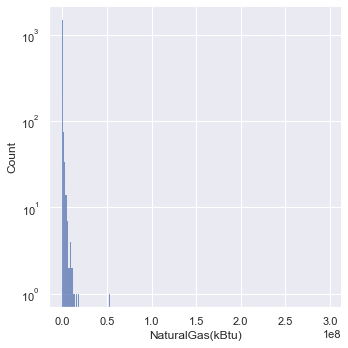

In [12]:
plt.figure(figsize=(10,10))
sns.displot(data=data,x='NaturalGas(kBtu)',log=True)

<Figure size 720x720 with 0 Axes>

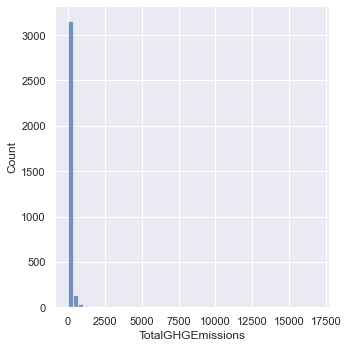

In [13]:
plt.figure(figsize=(10,10))
sns.displot(data=data,x='TotalGHGEmissions',bins=50)

## Valeurs manquantes

In [14]:
data.isna().mean().sort_values(ascending=False).head(15)

Comments                           1.000000
Outlier                            0.990521
YearsENERGYSTARCertified           0.964751
ThirdLargestPropertyUseType        0.823460
ThirdLargestPropertyUseTypeGFA     0.823460
SecondLargestPropertyUseType       0.502666
SecondLargestPropertyUseTypeGFA    0.502666
ENERGYSTARScore                    0.249704
LargestPropertyUseTypeGFA          0.005924
LargestPropertyUseType             0.005924
ZipCode                            0.004739
SourceEUI(kBtu/sf)                 0.002666
ListOfAllPropertyUseTypes          0.002666
TotalGHGEmissions                  0.002666
GHGEmissionsIntensity              0.002666
dtype: float64

## Variable Outlier ? 

In [15]:
data.loc[
    data['Outlier'].notnull()
]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,...,1.166315e+07,39794668.0,16048.309570,1604831.0,False,NaN,Non-Compliant,High outlier,362.66,2.10
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,...,9.348260e+04,318963.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,2.22,0.03
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,...,4.715030e+05,1608768.0,3430.500488,343050.0,False,NaN,Non-Compliant,Low outlier,29.43,0.19
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,...,7.953454e+06,27137187.0,0.000000,0.0,False,NaN,Non-Compliant,High outlier,189.18,1.46
720,19708,2016,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,Seattle,WA,98121.0,0586400000,...,6.265616e+05,2137828.0,2700.760010,270076.0,False,NaN,Non-Compliant,Low outlier,29.25,0.17
834,19934,2016,Multifamily LR (1-4),Low-Rise Multifamily,Belmont Lofts,231 Belmont Ave E,Seattle,WA,98102.0,0704600000,...,7.502090e+04,255971.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,1.78,0.06
839,19967,2016,SPS-District K-12,K-12 School,Queen Anne Gym,1431 2nd Ave N,Seattle,WA,98109.0,0811000005,...,7.228240e+04,246628.0,1848.439575,184844.0,True,NaN,Error - Correct Default Data,Low outlier,11.54,0.32
962,20367,2016,Multifamily LR (1-4),Low-Rise Multifamily,City Lights on Harbor,2349 Harbor Ave. SW,Seattle,WA,98126.0,1595200000,...,2.058855e+05,702481.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,4.90,0.07
1045,20617,2016,NonResidential,Retail Store,Seattle Habitat Store,21 S Nevada St,Seattle,WA,98134.0,1824049074,...,1.436250e+04,49005.0,964.640015,96464.0,True,NaN,Error - Correct Default Data,Low outlier,5.46,0.14
1229,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1520 Fifth Ave,Seattle,WA,98101.0,1975700135,...,7.064900e+03,24105.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,0.17,0.00


Text(0.5, 1.0, 'Emissions par types de bâtiments')

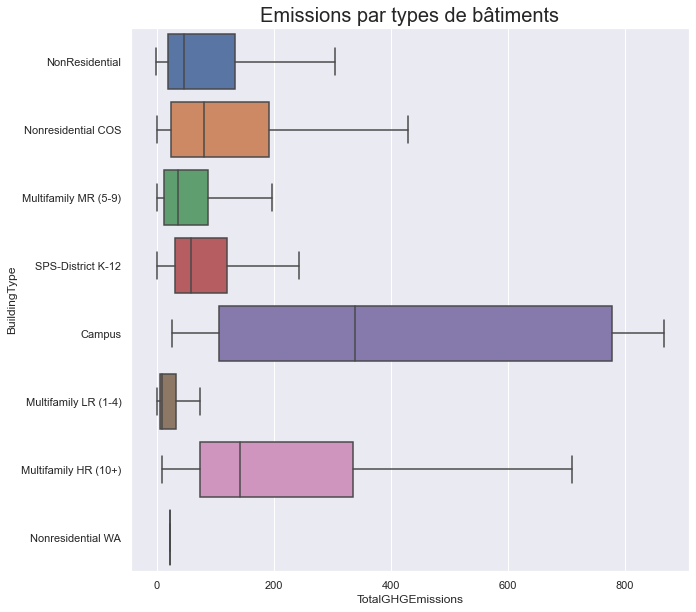

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(
    data=data, 
    y='BuildingType',
    x='TotalGHGEmissions',
    showfliers = False
    ).set_title("Emissions par types de bâtiments",
               fontdict={'size': 20}
               )

Text(0.5, 1.0, "Emissions par types d'activités")

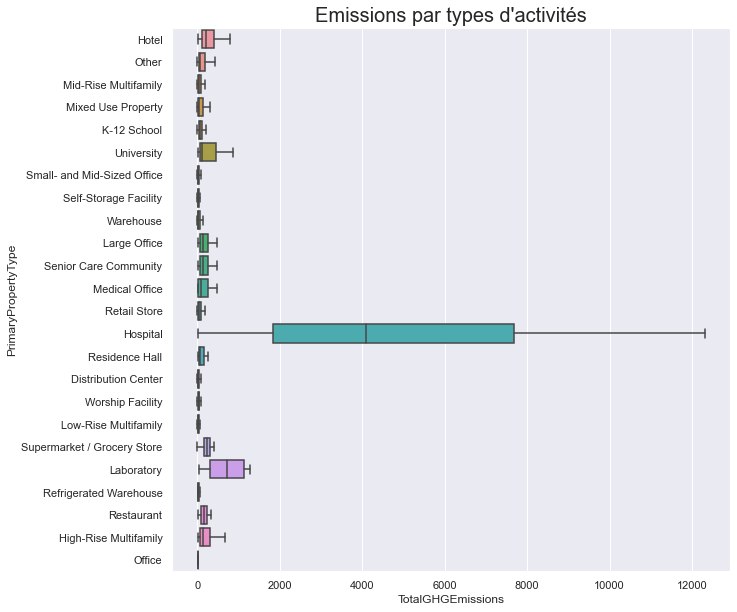

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(
    data=data, 
    y='PrimaryPropertyType',
    x='TotalGHGEmissions',
    showfliers = False

).set_title(
    "Emissions par types d'activités",
    fontdict={'size': 20}
)

Text(0.5, 1.0, "Emissions par types d'activités sans les Hopitaux")

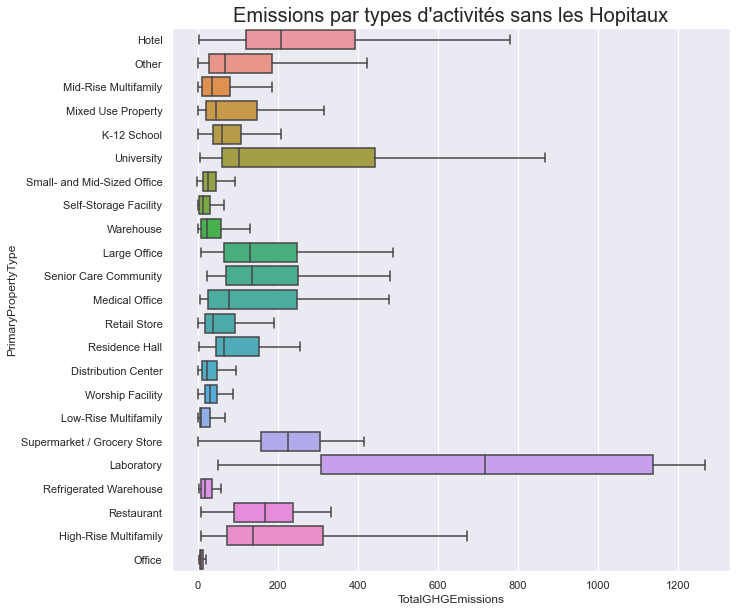

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(
    data=data.loc[
        data['PrimaryPropertyType'] != 'Hospital'
    ], 
    y='PrimaryPropertyType',
    x='TotalGHGEmissions',
    showfliers = False

).set_title(
    "Emissions par types d'activités sans les Hopitaux",
    fontdict={'size': 20}
)

Text(0.5, 1.0, 'Emissions par quartiers')

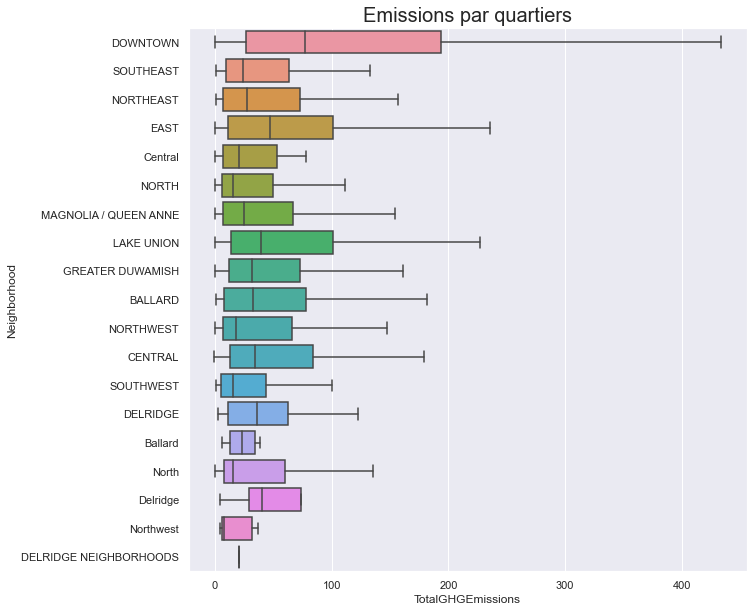

In [19]:
plt.figure(figsize=(10,10))
sns.boxplot(
    data=data, 
    y='Neighborhood',
    x='TotalGHGEmissions',
    showfliers = False
).set_title("Emissions par quartiers",
               fontdict={'size': 20}
               )

Text(0.5, 1.0, 'Emissions m2 par années de construction')

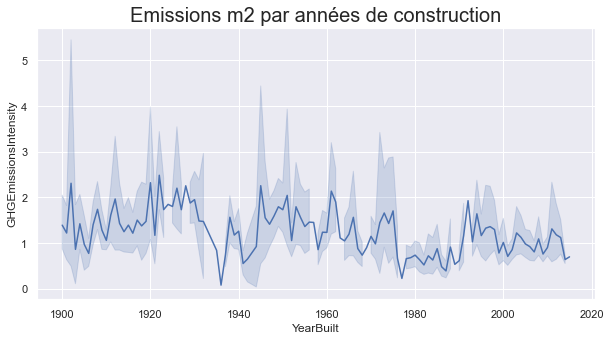

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=data, 
    y='GHGEmissionsIntensity',
    x='YearBuilt').set_title("Emissions m2 par années de construction",
               fontdict={'size': 20}
               )

> Émissions liées à l'activité : construction, secteur industriel. Période de la Seconde Guerre Mondiale et après guerre pic d'activité.

In [21]:
data[['TotalGHGEmissions','GHGEmissionsIntensity']].describe()

,TotalGHGEmissions,GHGEmissionsIntensity
count,3367.000000,3367.000000
mean,119.723971,1.175916
std,538.832227,1.821452
min,-0.800000,-0.020000
25%,9.495000,0.210000
50%,33.920000,0.610000
75%,93.940000,1.370000
max,16870.980000,34.090000


In [22]:
data[['TotalGHGEmissions','GHGEmissionsIntensity']].corr()

,TotalGHGEmissions,GHGEmissionsIntensity
TotalGHGEmissions,1.000000,0.470212
GHGEmissionsIntensity,0.470212,1.000000


In [23]:
data[['TotalGHGEmissions','NumberofBuildings']].corr()

,TotalGHGEmissions,NumberofBuildings
TotalGHGEmissions,1.000000,0.405261
NumberofBuildings,0.405261,1.000000


<AxesSubplot:>

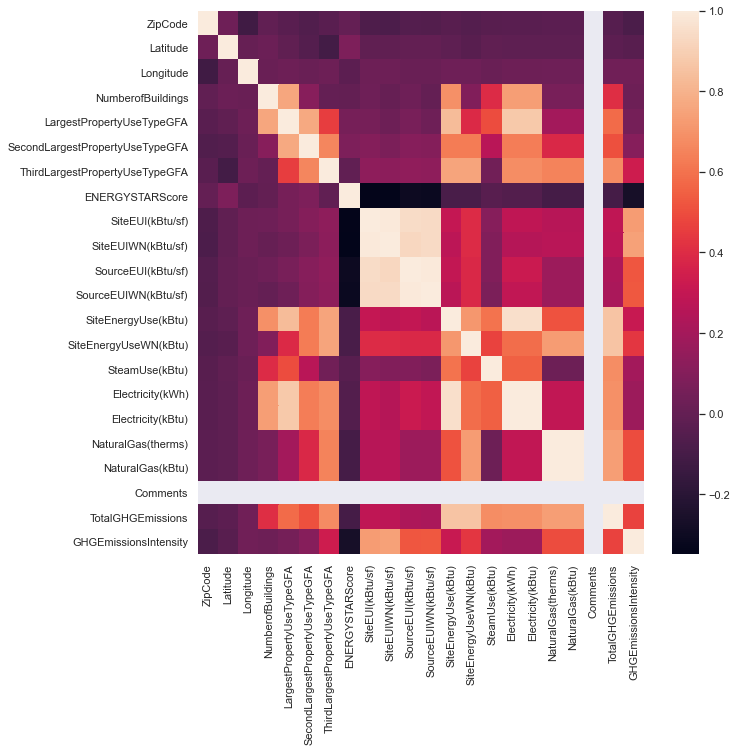

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(
    data.select_dtypes(include=['float64']).corr()
)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

<AxesSubplot:ylabel='Frequency'>

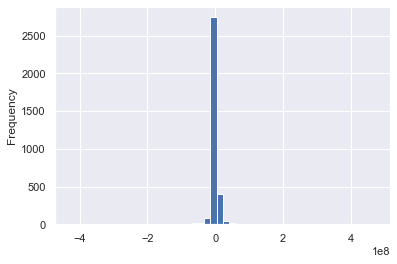

In [26]:
data['SiteEnergyUseWN(kBtu)'].diff().plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

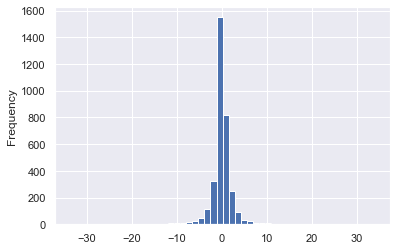

In [27]:
data.GHGEmissionsIntensity.diff().plot.hist(bins=50)

# Nettoyage 
    Suppression des Outliers
    Première selection des variables

# Sélection des valeurs non résidentielles 

In [28]:
data['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [29]:
Non_Residential_select = ['NonResidential','Nonresidential COS','SPS-District K-12','Nonresidential WA','Campus']

In [30]:
df = data.loc[data['BuildingType'].isin(Non_Residential_select)]

In [31]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [32]:
df.PrimaryPropertyType.value_counts()

Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Restaurant                      12
Refrigerated Warehouse          12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: PrimaryPropertyType, dtype: int64

Doit-on conserver : 
- les maisons de retraite ==> Senior Care community , 
- Mixed use Property, 
- residence universitaire : Residence Hall, 
- Low-Rise Multifamily ?

#### On conserve uniquement les logements Mixed use Property

In [33]:
drop_PrimaryPropertyType = ['Low-Rise Multifamily','Residence Hall','Senior Care Community']

df = df.loc[~df['PrimaryPropertyType'].isin(drop_PrimaryPropertyType)]

df.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Medical Office', 'Retail Store', 'Hospital',
       'Distribution Center', 'Worship Facility',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Office'], dtype=object)

In [34]:
df.loc[ 
    (df['PrimaryPropertyType']=='Mixed Use Property')
].head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
18,24,2016,NonResidential,Mixed Use Property,The Rainier Club,820 4th Ave.,Seattle,WA,98104.0,0942000510,...,1.103397e+06,3764791.0,2.065091e+04,2065091.0,False,NaN,Compliant,NaN,273.02,4.75
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,...,4.410208e+07,150476283.0,2.979090e+06,297909000.0,False,NaN,Compliant,NaN,16870.98,34.09
47,60,2016,NonResidential,Mixed Use Property,Mann Building,1401 3rd Avenue,Seattle,WA,98101.0,1975700525,...,1.357696e+06,4632459.0,1.039374e+05,10393737.0,False,NaN,Compliant,NaN,584.31,11.12
65,96,2016,NonResidential,Mixed Use Property,Central Seattle,921 Terry Ave.,Seattle,WA,98104.0,1979200290,...,2.973421e+06,10145313.0,0.000000e+00,0.0,False,NaN,Compliant,NaN,481.97,4.83
164,264,2016,NonResidential,Mixed Use Property,TriBeCa,516 1st Ave W,Seattle,WA,98119.0,8681450000,...,2.971734e+06,10139555.0,4.183540e+03,418354.0,False,NaN,Compliant,NaN,92.91,0.84


On retouve dans Mixed Use Property des pompiers , sécurité, ou logement mixed de type club sportif, institut

 ### Données aberrantes / non conforme 

In [35]:
df.Outlier.value_counts()

Low outlier     14
High outlier     2
Name: Outlier, dtype: int64

In [36]:
df['ComplianceStatus'].value_counts()

Compliant                       1505
Error - Correct Default Data      88
Non-Compliant                     17
Missing Data                      14
Name: ComplianceStatus, dtype: int64

In [37]:
df.DefaultData.value_counts()

False    1536
True       88
Name: DefaultData, dtype: int64

In [38]:
df.loc[
        (df['Outlier'].notnull()) 
].TotalGHGEmissions.describe()

count     16.000000
mean      38.854375
std       98.084673
min        0.120000
25%        0.650000
50%        2.865000
75%        9.327500
max      362.660000
Name: TotalGHGEmissions, dtype: float64

In [39]:
df.loc[
        (df['Outlier'].isnull()) &
        (df['ComplianceStatus']=='Compliant')
].TotalGHGEmissions.describe()

count     1505.000000
mean       192.750884
std        788.344773
min         -0.800000
25%         20.120000
50%         49.250000
75%        142.390000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

#### On supprimer les Outliers

In [40]:
df = df.loc[
            (df['Outlier'].isnull()) &
            (df['ComplianceStatus']=='Compliant')
]

In [41]:
df.loc[
        df['TotalGHGEmissions'] < 0
]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,Seattle,WA,98122.0,7234600195,...,-33826.80078,-115417.0,0.0,0.0,False,NaN,Compliant,NaN,-0.8,-0.02


In [42]:
df.loc[
        (df['TotalGHGEmissions'] < 0) 
]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,Seattle,WA,98122.0,7234600195,...,-33826.80078,-115417.0,0.0,0.0,False,NaN,Compliant,NaN,-0.8,-0.02


In [43]:
df = df.loc[
        df['TotalGHGEmissions'] > 0
]

# Sélection des variables
    Variables non informatives 

In [44]:
df = df.drop(['City', # Valeur unique 
         'State', # valeur unique 
         'DataYear', # valeur unique 
         'ZipCode', # variable non informative
         'TaxParcelIdentificationNumber', # variable non informative
         'Comments', # 100 % NA
         'Outlier', # valeur unique car cleané 
         'ComplianceStatus', # valeur unique car cleané 
         'DefaultData', # valeur unique car cleané 
         'YearsENERGYSTARCertified', # 94 % missing data
        ], 
        axis = 1)

In [45]:
df.isna().mean().sort_values(ascending=False).head(10)

ThirdLargestPropertyUseType        0.773786
ThirdLargestPropertyUseTypeGFA     0.773786
SecondLargestPropertyUseType       0.452428
SecondLargestPropertyUseTypeGFA    0.452428
ENERGYSTARScore                    0.363273
LargestPropertyUseTypeGFA          0.002661
LargestPropertyUseType             0.002661
SiteEUIWN(kBtu/sf)                 0.000665
SiteEnergyUseWN(kBtu)              0.000665
Neighborhood                       0.000000
dtype: float64

In [46]:
df[df.columns[df.columns.str.contains('LargestPropertyUseType')]]

,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
0,Hotel,88434.0,NaN,NaN,NaN,NaN
1,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0
2,Hotel,756493.0,NaN,NaN,NaN,NaN
3,Hotel,61320.0,NaN,NaN,NaN,NaN
4,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0
...,...,...,...,...,...,...
3370,Other - Recreation,18261.0,NaN,NaN,NaN,NaN
3372,Other - Recreation,16000.0,NaN,NaN,NaN,NaN
3373,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0
3374,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0


In [47]:
AllPropertyUseType = pd.concat(
    [df['LargestPropertyUseType'],
    df['SecondLargestPropertyUseType'],
    df['ThirdLargestPropertyUseType']]
)

AllPropertyUseType.nunique()

62

Text(0.5, 1.0, 'Emissions par PropetyUse')

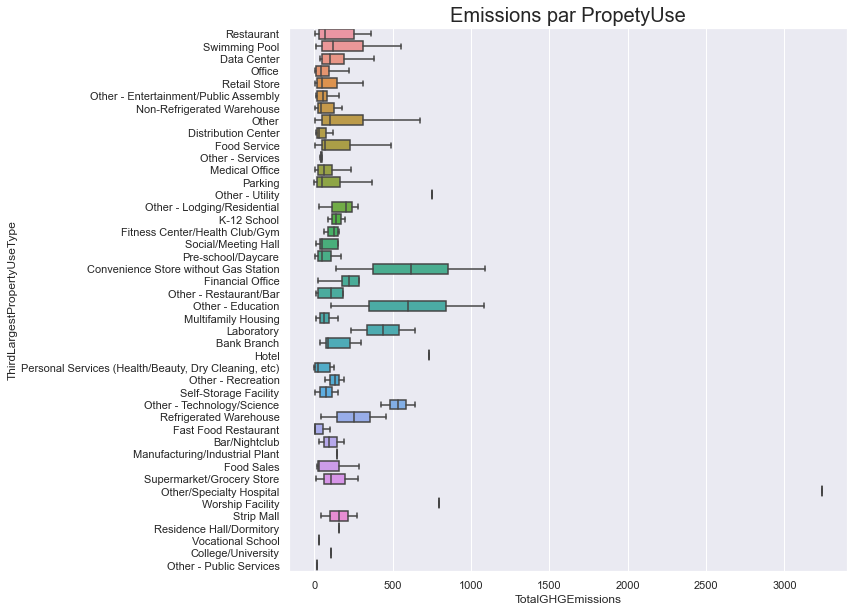

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(
    data=data, 
    y='ThirdLargestPropertyUseType',
    x='TotalGHGEmissions',
    showfliers = False
).set_title("Emissions par PropetyUse",
               fontdict={'size': 20}
               )

# Feature Engineering

### Transformation / encodage : LargestPropoertyUseType 1 ,  2 et 3 

In [49]:
pt = pd.DataFrame({
    'id' : pd.concat([df.OSEBuildingID, df.OSEBuildingID, df.OSEBuildingID]),
    'type' : pd.concat([df[col] for col in ["LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]]),
    'sf' : pd.concat([df[col] for col in ["LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA"]]),
    'total' : pd.concat([df.PropertyGFATotal, df.PropertyGFATotal, df.PropertyGFATotal])
})
pt['sf'] = pt['sf']/pt['total'] # Part m2 divisé par total

In [50]:
pt

,id,type,sf,total
0,1,Hotel,1.000000,88434
1,2,Hotel,0.809918,103566
2,3,Hotel,0.791220,956110
3,5,Hotel,1.000000,61320
4,8,Hotel,0.703070,175580
...,...,...,...,...
3370,50221,NaN,NaN,18261
3372,50223,NaN,NaN,16000
3373,50224,Swimming Pool,0.000000,13157
3374,50225,Pre-school/Daycare,0.034324,14101


In [51]:
pt2 = pt.type.value_counts()[pt.type.value_counts()<10].to_frame().reset_index()
pt2

,index,type
0,Financial Office,9
1,Other - Restaurant/Bar,9
2,Other - Education,7
3,Automobile Dealership,7
4,Strip Mall,7
5,Other - Lodging/Residential,6
6,Other/Specialty Hospital,5
7,Museum,5
8,Performing Arts,5
9,Adult Education,4


In [52]:
to_replace = list(pt2['index'])

In [53]:
pt['type'] = np.where(
                pt['type'].isin(to_replace),
                'Other',
                pt['type']
            )

In [54]:
pt['type'].nunique()

30

In [55]:
pt = pt.pivot_table(index='id',columns='type',values='sf').fillna(0)
pt = pt.reset_index().rename(columns={'id':'OSEBuildingID'})
pt

type,OSEBuildingID,Bank Branch,College/University,Data Center,Distribution Center,Fitness Center/Health Club/Gym,Food Service,Hospital (General Medical & Surgical),Hotel,K-12 School,...,Pre-school/Daycare,Refrigerated Warehouse,"Repair Services (Vehicle, Shoe, Locksmith, etc)",Restaurant,Retail Store,Self-Storage Facility,Social/Meeting Hall,Supermarket/Grocery Store,Swimming Pool,Worship Facility
0,1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.809918,0.0,...,0.000000,0.0,0.0,0.044629,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.791220,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.703070,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,50221,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1495,50223,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1496,50224,0.0,0.0,0.0,0.0,0.423653,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1497,50225,0.0,0.0,0.0,0.0,0.461031,0.0,0.0,0.000000,0.0,...,0.034324,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Calcul de la part d'energie des différentes sources 

In [56]:
df['test'] = df['SteamUse(kBtu)'] + df['Electricity(kBtu)'] + df['NaturalGas(kBtu)']

In [57]:
df[
    ['OSEBuildingID', # ID 
     
    'SiteEUI(kBtu/sf)', #  total conso site facture/ m2/ en kbtu
    'SiteEUIWN(kBtu/sf)', # Normalisé sur 30 ans condition météo
     
    'SourceEUI(kBtu/sf)', # Intensité : prends en compte perte de distribution / pied carré
    'SourceEUIWN(kBtu/sf)', # Normalisé sur 30 ans condition météo
     
    'SiteEnergyUse(kBtu)', # The annual amount of energy consumed by the property from all sources of energy.
    'SiteEnergyUseWN(kBtu)', # Ajusté 30 ans de météo, cible 1
     
    'SteamUse(kBtu)', # Vapeur 
    'Electricity(kBtu)', # électricité
    'NaturalGas(kBtu)', # Gaz
     
    'TotalGHGEmissions', # cible 2 
    'GHGEmissionsIntensity',
    'test']
    
]

,OSEBuildingID,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,test
0,1,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83,7.226362e+06
1,2,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86,8.387933e+06
2,3,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,4.952666e+07,1.493800e+06,2089.28,2.19,7.258702e+07
3,5,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67,6.794583e+06
4,8,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88,1.417260e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,51.000000,56.200001,126.000000,136.600006,9.320821e+05,1.025432e+06,0.00,6.323620e+05,2.997200e+05,20.33,1.11,9.320820e+05
3372,50223,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.00,3.965461e+05,5.537300e+05,32.17,2.01,9.502760e+05
3373,50224,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,1.792159e+06,3.973739e+06,223.54,16.99,5.765898e+06
3374,50225,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,3.488702e+05,3.706010e+05,22.11,1.57,7.194712e+05


In [58]:
(df['SiteEnergyUseWN(kBtu)'] == df['SteamUse(kBtu)'] + df['Electricity(kBtu)'] + df['NaturalGas(kBtu)']).value_counts()

False    1470
True       33
dtype: int64

## On test 
    SiteEnergyUse(kBtu) est bien la somme de SteamUse(kBtu) Electricity(kBtu) et NaturalGas(kBtu)

In [59]:
df[['test','SiteEnergyUse(kBtu)']].corr()

,test,SiteEnergyUse(kBtu)
test,1.000000,0.996367
SiteEnergyUse(kBtu),0.996367,1.000000


In [60]:
df['site_per_gaz'] = df['NaturalGas(kBtu)']/df['SiteEnergyUse(kBtu)']
df['site_per_electricity'] = df['Electricity(kBtu)']/df['SiteEnergyUse(kBtu)']
df['site_per_steam'] = df['SteamUse(kBtu)']/df['SiteEnergyUse(kBtu)']

In [61]:
df[['site_per_gaz',
    'site_per_electricity',
    'site_per_steam',
    'SiteEnergyUse(kBtu)'
    
]]

,site_per_gaz,site_per_electricity,site_per_steam,SiteEnergyUse(kBtu)
0,0.176638,0.546060,0.277302,7.226362e+06
1,0.613391,0.386609,0.000000,8.387933e+06
2,0.020579,0.682307,0.297113,7.258702e+07
3,0.266567,0.407519,0.325913,6.794584e+06
4,0.621198,0.378802,0.000000,1.417261e+07
...,...,...,...,...
3370,0.321560,0.678440,0.000000,9.320821e+05
3372,0.582704,0.417296,0.000000,9.502762e+05
3373,0.689180,0.310820,0.000000,5.765898e+06
3374,0.515102,0.484898,0.000000,7.194712e+05


# Distribution des variables cibles
    target 1 : TotalGHGEmissions
    target 2 : SiteEnergyUseWN(kBtu)

In [62]:
from statsmodels.graphics.gofplots import qqplot

In [63]:
df.shape

(1503, 40)

### Cible 1 : TotalGHGEmissions

In [64]:
df = df.query('TotalGHGEmissions > 1').copy() # Suppression des valeurs nulles
df = df.loc[df['SiteEnergyUseWN(kBtu)'] > 1] # Suppression des valeurs nulles

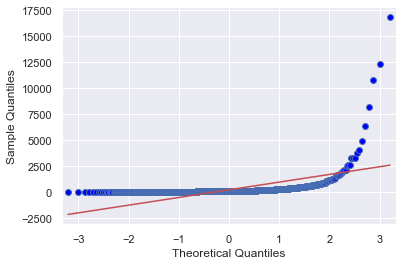

In [65]:
qqplot(df['TotalGHGEmissions'],line='s')
plt.show()

### Cible 1 : log de TotalGHGEmissions

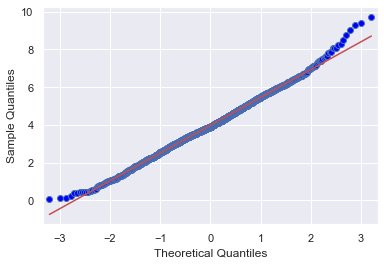

In [66]:
qqplot(np.log(df['TotalGHGEmissions']),line='s')
plt.show()

### Cible 2 : SiteEnergyUseWN(kBtu)

In [67]:
df['SiteEnergyUseWN(kBtu)'].min() 

116642.5

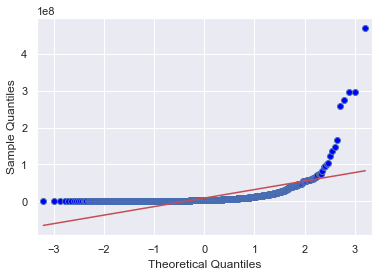

In [68]:
qqplot(df['SiteEnergyUseWN(kBtu)'],line='s')
plt.show()

### Cible 2 : log de  SiteEnergyUseWN(kBtu)

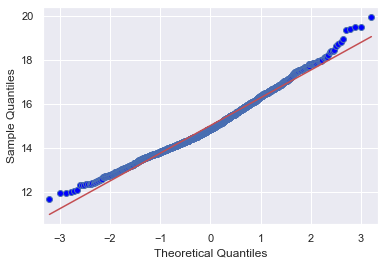

In [69]:
qqplot(np.log(df['SiteEnergyUseWN(kBtu)']),line='s')
plt.show()

## Transformation Log

In [70]:
df['log_TotalGHGEmissions'] =   np.log(df['TotalGHGEmissions'] )
df['log_SiteEnergyUseWN(kBtu)'] = np.log(df['SiteEnergyUseWN(kBtu)'])

In [71]:
df[['SiteEnergyUseWN(kBtu)','log_SiteEnergyUseWN(kBtu)','TotalGHGEmissions','log_TotalGHGEmissions']].describe().round(2)

,SiteEnergyUseWN(kBtu),log_SiteEnergyUseWN(kBtu),TotalGHGEmissions,log_TotalGHGEmissions
count,1.483000e+03,1483.00,1483.00,1483.00
mean,8.573457e+06,15.01,186.89,3.98
std,2.318869e+07,1.27,740.98,1.48
min,1.166425e+05,11.67,1.06,0.06
25%,1.338133e+06,14.11,20.71,3.03
50%,2.828172e+06,14.86,49.55,3.90
75%,7.564924e+06,15.84,142.86,4.96
max,4.716139e+08,19.97,16870.98,9.73


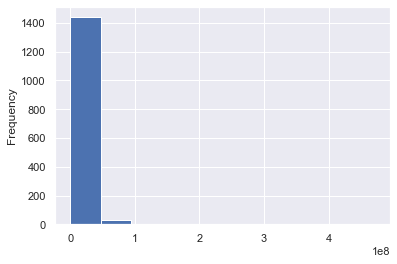

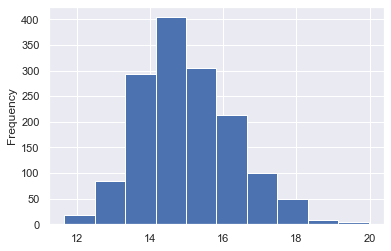

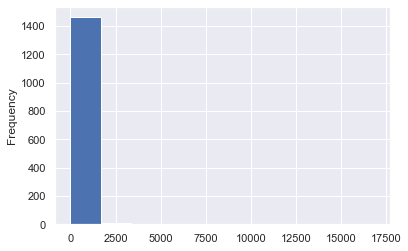

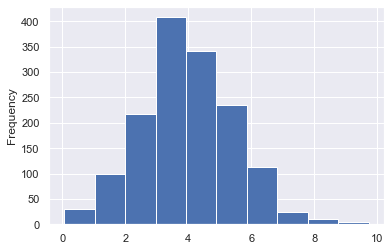

In [72]:
var = ['SiteEnergyUseWN(kBtu)','log_SiteEnergyUseWN(kBtu)','TotalGHGEmissions','log_TotalGHGEmissions']
for var in df[var]:
    df[var].plot(kind='hist')
    plt.show()

> Transformation log semble correcte

# Jointure DF final

In [91]:
df['per_gfa_parking'] = df['PropertyGFAParking']/df['PropertyGFATotal']
df['per_gfa_bulding'] = df['PropertyGFABuilding(s)']/df['PropertyGFATotal']

In [92]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'CouncilDistrictCode', 'Neighborhood', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'test', 'site_per_gaz', 'site_per_electricity', 'site_per_steam',
       'log_TotalGHGEmissions', 'log_SiteEnergyUseWN(kBtu)

In [93]:
df2 = df[                             # Sélection des variables du df 
    ['OSEBuildingID', # ID
     'Latitude', # Geo 1
     'Longitude', # Geo 2
     'YearBuilt', # Année de construction
     'NumberofBuildings', # Nb batiment
     'NumberofFloors', # nb étage
     'per_gfa_parking', # pourcentage parking m2
     'per_gfa_bulding', # Pourcentage batiment m2
     'site_per_electricity', # part électricité consommation totale
     'site_per_steam', # part vapeur consommation totale
     'site_per_gaz', # part gaz consommation totale
     'log_TotalGHGEmissions', # target 1
     'log_SiteEnergyUseWN(kBtu)'] # target 2
    
]

In [94]:
db = df2.merge(pt,how='left',on='OSEBuildingID')

In [95]:
display(db.columns)

Index(['OSEBuildingID', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'per_gfa_parking',
       'per_gfa_bulding', 'site_per_electricity', 'site_per_steam',
       'site_per_gaz', 'log_TotalGHGEmissions', 'log_SiteEnergyUseWN(kBtu)',
       'Bank Branch', 'College/University', 'Data Center',
       'Distribution Center', 'Fitness Center/Health Club/Gym', 'Food Service',
       'Hospital (General Medical & Surgical)', 'Hotel', 'K-12 School',
       'Laboratory', 'Manufacturing/Industrial Plant', 'Medical Office',
       'Multifamily Housing', 'Non-Refrigerated Warehouse', 'Office', 'Other',
       'Other - Entertainment/Public Assembly', 'Other - Recreation',
       'Other - Services', 'Parking', 'Pre-school/Daycare',
       'Refrigerated Warehouse',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Restaurant',
       'Retail Store', 'Self-Storage Facility', 'Social/Meeting Hall',
       'Supermarket/Grocery Store', 'Swimming Pool', 'Worsh

In [96]:
db

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,per_gfa_parking,per_gfa_bulding,site_per_electricity,site_per_steam,...,Pre-school/Daycare,Refrigerated Warehouse,"Repair Services (Vehicle, Shoe, Locksmith, etc)",Restaurant,Retail Store,Self-Storage Facility,Social/Meeting Hall,Supermarket/Grocery Store,Swimming Pool,Worship Facility
0,1,47.61220,-122.33799,1927,1.0,12,0.000000,1.000000,0.546060,0.277302,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,47.61317,-122.33393,1996,1.0,11,0.145453,0.854547,0.386609,0.000000,...,0.000000,0.0,0.0,0.044629,0.0,0.0,0.0,0.0,0.0,0.0
2,3,47.61393,-122.33810,1969,1.0,41,0.205748,0.794252,0.682307,0.297113,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,5,47.61412,-122.33664,1926,1.0,10,0.000000,1.000000,0.407519,0.325913,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,8,47.61375,-122.34047,1980,1.0,18,0.353115,0.646885,0.378802,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,50221,47.54067,-122.37441,1982,1.0,1,0.000000,1.000000,0.678440,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1479,50223,47.59625,-122.32283,2004,1.0,1,0.000000,1.000000,0.417296,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1480,50224,47.63644,-122.35784,1974,1.0,1,0.000000,1.000000,0.310820,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1481,50225,47.52832,-122.32431,1989,1.0,1,0.000000,1.000000,0.484898,0.000000,...,0.034324,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Exportation 

In [98]:
db.to_parquet('db_P4.parquet.gzip',
              compression='gzip') 

In [99]:
db.to_csv('db_P4.scv',index=False)